# 机器学习作业KNN

姓名：雷贺奥

学号：2013551

专业：计算机科学与技术

# 题目：基于KNN 的手写数字识别
实验条件：给定semeion手写数字数据集，给定kNN分类算法
实验要求：
1. 基本要求：编程实现kNN算法；给出在不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（要求采用留一法）

2. 中级要求：与weka机器学习包中的kNN分类结果进行对比

3. 提高要求：将实验过程结果等图示展出

# 数据预处理

In [15]:
import pandas as pd
import numpy as np
from collections import Counter
data=pd.read_csv("semeion.data",header=None)
data.shape#(1592,1)
num=1593
data=np.array(data)
#去掉每一行末尾的空格和回车
data[0][0] = data[0][0].rstrip(' \n')
#将一行数据以空格分开存入列表
currentLine = data[0][0].split(' ')
list_count= Counter(currentLine)
print(list_count)
X_data=np.zeros((num,256))
Y_data=np.zeros((num,10))
#将特征值存入特征矩阵
X_data[0][:] = currentLine[:256]
#将标签值存入标签矩阵
Y_data[0][:] = currentLine[256:]
for i in range(1,num):
    #去掉每一行末尾的空格和回车
    data[i][0] = data[i][0].rstrip(' \n')
    #将一行数据以空格分开存入列表
    currentLine = data[i][0].split(' ')
    #将特征值存入特征矩阵
    X_data[i][:] = currentLine[:256]
    #将标签值存入标签矩阵
    Y_data[i][:] = currentLine[256:]

print("X_data:")
print(X_data)
print("Y_data:")
print(Y_data)

Counter({'0.0000': 132, '1.0000': 124, '0': 9, '1': 1})
X_data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Y_data:
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


# 划分训练集和测试集

In [16]:
label=[]#标签，Y_data中下标
#初始化
for i in range(num):
    label.append(0)
for i in range(num):
    for j in range(10):
        if(Y_data[i][j]):
            label[i]=j
label=np.array(label)
# 将X_data与label合并
preprocess = np.hstack((X_data, label.reshape((num,1))))
# 将二维数组写入 CSV 
np.savetxt( "pre.csv", preprocess, delimiter="," )

#导入sklearn库中的train_test_split函数，划分训练集和测试集
from sklearn.model_selection import train_test_split  
X_trainingSet, X_testSet, y_trainingSet, y_testSet = train_test_split(X_data, label, random_state=1) 
print(X_trainingSet.shape,y_trainingSet.shape)
print(X_testSet.shape,y_testSet.shape)
print(type(y_testSet))

(1194, 256) (1194,)
(399, 256) (399,)
<class 'numpy.ndarray'>


# 使用sklearn-KNN标准库训练

In [17]:
from sklearn.neighbors import KNeighborsClassifier 
KNN_standard = KNeighborsClassifier(algorithm='kd_tree')
KNN_standard.fit(X_trainingSet,y_trainingSet)
predict_standard=KNN_standard.predict(X_testSet)
from sklearn.metrics import accuracy_score  
print("KNN标准库并且使用split划分的正确率为：",accuracy_score(y_testSet, predict_standard))

KNN标准库并且使用split划分的正确率为： 0.87468671679198


# 模型评价（留一法划分)

[1, 3, 5, 7]
[0.9171374764595104, 0.903954802259887, 0.9052102950408035, 0.9096045197740112]


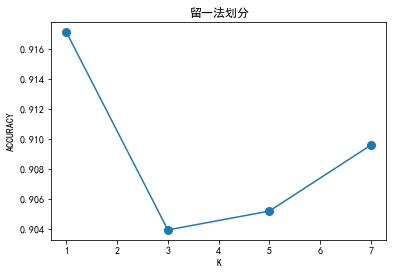

In [18]:
score=[]#精确度
K=[]#距离定义
import matplotlib.pyplot as plt

#留一法划分
for i in range(1,9,2):
    correct = 0
    temp= KNeighborsClassifier(i)
    for test in range(num):
        train_ix=np.delete(X_data,test,axis=0)
        train_iy=np.delete(label,test,axis=0)
        temp.fit(train_ix,train_iy)
        p=[X_data[test]]
        y_sample = temp.predict(p)
        if y_sample == label[test]:          
            correct += 1
    score.append(correct/num)
    K.append(i)
print(K)
print(score)
plt.rc('font', family='SimHei', size=13)
plt.plot(K,score,marker='o',markersize=8)
plt.xlabel('K')
plt.ylabel('ACCURACY')
plt.title('留一法划分')
plt.show()        

# weka-KNN标准库训练

在处理好数据后，即前文中保存的pre.csv,直接另存为pre.arff,随后导入weka软件包即可，由于使用的为留一法,
设置cross validation Flods=num即可。

# K=1,Accuracy=89.29%

In [12]:
%%HTML
<img src="./k1.png", width=640, heigth=480>

# K=3,Accuracy=90.80%

In [13]:
%%HTML
<img src="./k3.png", width=640, heigth=480>

# K=5,Accuracy=90.71%

In [14]:
%%HTML
<img src="./k5.png", width=640, heigth=480>

# myKNN函数定义

In [19]:
#欧氏距离
import math
def distance_o(array1,array2,size):
    sum=0;
    for i in range(size):
        sum=(array1[i]-array2[i])*(array1[i]-array2[i])+sum
    return math.sqrt(sum)
#KNN
def myKNN(k,X_train,label_train,X_predict1):#X_predict为单个预测数据
    arrive=[]
    distance=[]#二维,（距离，标签）
    firstK=[]
    #前k个欧式距离
    for index in range(label_train.size):
        distance.append([])
        distance[index].append(distance_o(X_train[index],X_predict1,256))
        distance[index].append(label[index])
    #选择排序，便于记录下标
    for i in range(k):
        min=[0,0]
        min[0]=distance[i][0]
        min[1]=distance[i][1]
        position=i
        for j in range(i,label_train.size):
            if min[0]>distance[j][0]:
                min[0]=distance[j][0]
                min[1]=distance[j][1]
                position=j
        #swap
        distance[position][0]=distance[i][0]
        distance[position][1]=distance[i][1]
        distance[i][0]=min[0]
        distance[i][1]=min[1]
        arrive.append(min[1])
        firstK.append(min[0])
        
    #输出arrive中出现最多的数据
    maxlabel=max(arrive,key=arrive.count)
    return maxlabel

print("test，应该为0，实际为：",myKNN(10,X_data,label,X_data[0]))

test，应该为0，实际为： 0


# myKNN模型评价（留一法）

0.9020715630885122 1
0.9146264908976773 3
0.9121155053358443 5
0.9215317011927181 7
[1, 3, 5, 7]
[0.9020715630885122, 0.9146264908976773, 0.9121155053358443, 0.9215317011927181]


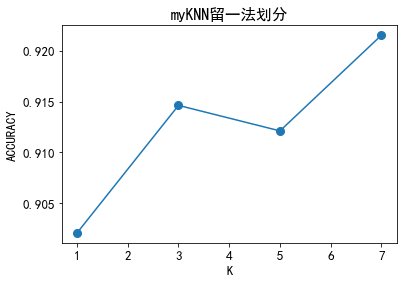

In [20]:
#留一法划分
score1=[]#精确度
K1=[]#距离定义
import matplotlib.pyplot as plt
for i in range(1,9,2):
    correct = 0
    #test为需要预测的数据，train中去除
    for test in range(num):
        train_ix=np.delete(X_data,test,axis=0)
        train_iy=np.delete(label,test,axis=0)
        y_sample=myKNN(i,train_ix,train_iy,X_data[test])
        if y_sample == label[test]:          
            correct += 1
    score1.append(correct/num)
    K1.append(i)
    print(correct/num,i)
print(K1)
print(score1)
plt.rc('font', family='SimHei', size=13)
plt.plot(K1,score1,marker='o',markersize=8)
plt.xlabel('K')
plt.ylabel('ACCURACY')
plt.title('myKNN留一法划分')
plt.show()        

# myKNN和标准库中KNN的比较

如图所示：

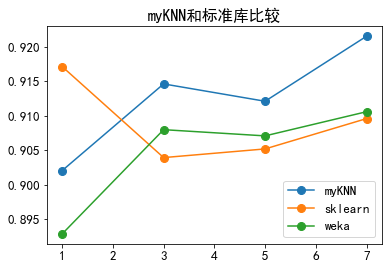

In [22]:
#经过weka软件包可以得出
weka=[0.8929,0.908,0.9071,0.9106]
plt.plot(K1,score1,marker='o',markersize=8)
plt.plot(K,score,marker='o',markersize=8)
plt.plot(K,weka,marker='o',markersize=8)
plt.title('myKNN和标准库比较')
plt.legend(['myKNN', 'sklearn','weka'])  # 设置折线名称
plt.show()